In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Pre-processing Data

In [119]:
df = pd.read_csv('drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [120]:
df.corr()

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


In [121]:
df = df.drop('Age', axis=1)

In [122]:
drugs_dict = {
    'DrugY':0, 
    'drugA':1, 
    'drugB':2, 
    'drugC':3, 
    'drugX':4
    }

df['Sex'] = df['Sex'].map({'M':1, 'F':2})
df['BP'] = df['BP'].map({'HIGH':1, 'NORMAL':2, 'LOW':3})
df['Cholesterol'] = df['Cholesterol'].map({'HIGH':1, 'NORMAL':2})
df['Drug'] = df['Drug'].map(drugs_dict)

## Countplot Drug Usage

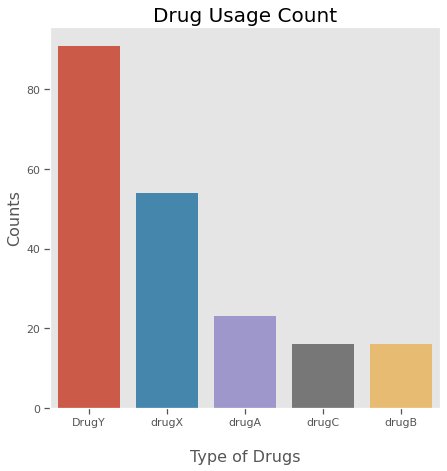

In [123]:
fig = plt.figure(figsize=(7,7))
ax = sns.countplot(df['Drug'], order=df['Drug'].value_counts(ascending=False).index)
plt.style.use('ggplot')
plt.title('Drug Usage Count', size=20)
plt.ylabel('Counts', size=16)
plt.xlabel('\nType of Drugs', size=16)
ax.set_xticklabels(['DrugY', 'drugX', 'drugA', 'drugC', 'drugB'])

plt.grid(False)
plt.show()

In [124]:
df['Drug'].value_counts(ascending=False)

0    91
4    54
1    23
3    16
2    16
Name: Drug, dtype: int64

# Data Modelling

In [125]:
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, mean_absolute_error, precision_score

In [126]:
X = df[['Sex','BP','Cholesterol','Na_to_K']].values
y = df['Drug'].values

# Decision Tree Classifier

## Predict-Accuracy

In [127]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)
dtc = DecisionTreeClassifier(random_state=0, max_depth=10).fit(X_train, y_train)
y_pred = dtc.predict(X_test)

print("DecisionTreeClassifier train accuracy = {:.2f}%".format(dtc.score(X_train, y_train) * 100))
print("DecisionTreeClassifier test accuracy = {:.2f}%".format(accuracy_score(y_pred, y_test) * 100))

print("DecisionTreeClassifier f1 score  = {:.2f}".format(f1_score(y_pred, y_test, average='macro')))

DecisionTreeClassifier train accuracy = 98.67%
DecisionTreeClassifier test accuracy = 94.00%
DecisionTreeClassifier f1 score  = 0.79


# Grid Search CV

In [128]:
from sklearn.model_selection import GridSearchCV
param = {'max_depth':[5,10,15,20], 'criterion':['gini', 'entropy'], 'random_state':[0]}
clf = GridSearchCV(DecisionTreeClassifier(), param_grid=param, scoring='f1_macro', cv=5, verbose=5)
clf.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END criterion=gini, max_depth=5, random_state=0;, score=0.680 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, random_state=0;, score=0.867 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, random_state=0;, score=0.860 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, random_state=0;, score=0.720 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, random_state=0;, score=0.714 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, random_state=0;, score=0.774 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, random_state=0;, score=0.867 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, random_state=0;, score=0.860 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, random_state=0;, score=0.714 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, random_state=0;, score=0.714 total time=   0.0s
[CV 1/5] END criterion=gini, max_de

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20], 'random_state': [0]},
             scoring='f1_macro', verbose=5)

## Confusion Matrix

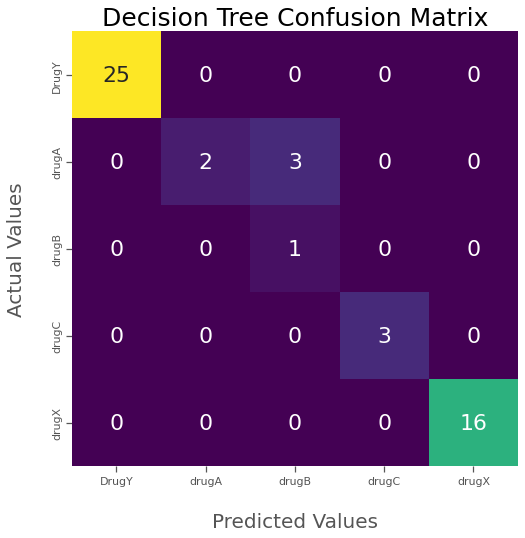

In [129]:
matrix = confusion_matrix(y_test, y_pred)

fig = plt.figure(figsize=(8,8))
sns.set_context('notebook')
ax = sns.heatmap(matrix, annot=True, cmap='viridis', annot_kws={'fontsize':22},cbar=False, 
        xticklabels=drugs_dict, yticklabels=drugs_dict)

plt.title('Decision Tree Confusion Matrix', size=25)
ax.set_xlabel('\nPredicted Values', size=20)
ax.set_ylabel('Actual Values\n', size=20)

plt.show()

## Classification Report - MEA

In [130]:
print(classification_report(y_test, y_pred, target_names=drugs_dict))

print(f"The mean absolute error score is {mean_absolute_error(y_test, y_pred)}")

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        25
       drugA       1.00      0.40      0.57         5
       drugB       0.25      1.00      0.40         1
       drugC       1.00      1.00      1.00         3
       drugX       1.00      1.00      1.00        16

    accuracy                           0.94        50
   macro avg       0.85      0.88      0.79        50
weighted avg       0.98      0.94      0.95        50

The mean absolute error score is 0.06


## 5-Fold Cross Validation

In [132]:
crossval_f1 = cross_val_score(DecisionTreeClassifier(random_state=0, max_depth=10), X, y, cv=5, scoring='f1_macro')

print('F1-Score cross validation 5 fold = {}'.format(crossval_f1))
print('F1-Score cross validation 5 fold mean = {}'.format(np.mean(crossval_f1)))
print()

crossval = cross_val_score(DecisionTreeClassifier(random_state=0, max_depth=10), X, y, cv=5, scoring='accuracy')

print('Accuracy score cross validation 5 fold = {}'.format(crossval))
print('Accuracy score cross validation 5 fold mean = {}'.format(np.mean(crossval)))

F1-Score cross validation 5 fold = [0.81333333 0.82545455 0.84761905 0.73110253 0.9       ]
F1-Score cross validation 5 fold mean = 0.8235018915018916

Accuracy score cross validation 5 fold = [0.925 0.925 0.925 0.85  0.95 ]
Accuracy score cross validation 5 fold mean = 0.915


## Feature Importances

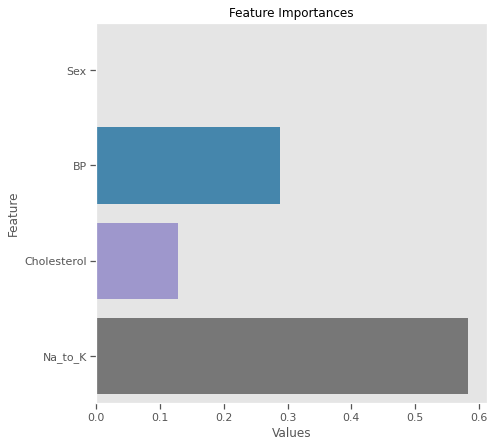

In [133]:
importances = dict(zip(df.columns[0:4], dtc.feature_importances_))
importances = pd.DataFrame({'Feature':importances.keys(), 'Values':importances.values()})

fig = plt.figure(figsize=(7,7))
ax = sns.barplot(importances['Values'], importances['Feature'])
plt.title('Feature Importances')
plt.grid(False)

plt.show()

## Sanity Check - Dummy Classifier

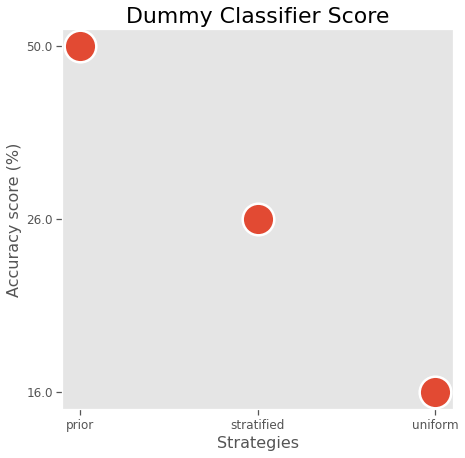

In [134]:
from sklearn.dummy import DummyClassifier

strategies = ['prior', 'stratified', 'uniform']
score = []

for i in strategies:
    dummy = DummyClassifier(strategy = i, random_state=0).fit(X_train, y_train)
    y_dummy_predictions = dummy.predict(X_test)
    dummy_score = (f"{dummy.score(X_test, y_test) * 100}")
    score.append(dummy_score)

fig = plt.figure(figsize=(7,7))
ax = sns.scatterplot(strategies, score, s=1000)
plt.style.use('ggplot')

plt.title('Dummy Classifier Score', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Accuracy score (%)', fontsize=16)
plt.xlabel('Strategies', fontsize=16)
plt.grid(False)

plt.show()

In [137]:
# XGB, Naive Bayes, knn